In [1]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

<Axes: xlabel='date'>

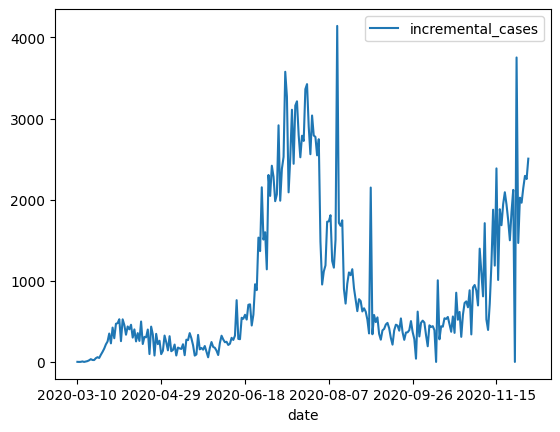

In [2]:
df = pd.read_csv('variable_selected_county_dataset.csv', index_col=0)

# get selected counties
miami = df[df.entity == 'Florida-Miami-Dade']
miami = miami[['date', 'incremental_cases']]
#miami.reset_index(inplace=True)
miami.plot(x='date', y='incremental_cases')


In [14]:
diffDf = miami.set_index('date')
#need to differentiate twice to not be stationary
statDF = diffDf.diff().diff()
firstVal = diffDf.diff(1).iloc[1,:].incremental_cases
firstDiff = diffDf.diff()
firstVal

split = int(0.85 * len(statDF))
train = statDF.iloc[:split,:]
test = statDF.iloc[split:, :]
compareTest = diffDf.iloc[split:, :]

In [16]:
def fromTestDiffToActualInc(test, firstVal, secondVal):
    test.iloc[0,0] += firstVal
    test = test.cumsum()
    test.iloc[0,0] += secondVal
    return test.cumsum()

In [5]:
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning, ValueWarning
warnings.simplefilter('ignore', ConvergenceWarning)
warnings.simplefilter('ignore', ValueWarning)

In [9]:
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error



# evaluate parameters
p_values = range(0,10,3)
d_values = range(0,10,3)
q_values = range(0,10,3)
vals = []
prev = 100000000000000000000000000
for p in p_values:
    for d in d_values:
        for q in q_values:
            orderToUse = (6,1,0) #from arima model
            hyperPar = (p, d, q, 7) #weekly data
            model = SARIMAX(train.incremental_cases, order=orderToUse, seasonal_order=hyperPar)
            model.initialize_approximate_diffuse()
            model_fit = model.fit()
            # summary of fit model
            #print(model_fit.summary())
            # line plot of residuals
            #residuals = pd.DataFrame(model_fit.resid)
            #residuals.plot()
            #plt.show()
            # density plot of residuals
            #residuals.plot(kind='kde')
            #plt.show()
            # summary stats of residuals
            #print(residuals.describe())
            forecast = model_fit.forecast(steps=41)

            predictTest = pd.DataFrame(forecast)
            predictTest.columns=['incremental_cases']

            foo = pd.DataFrame(model_fit.fittedvalues, columns=['incremental_cases'])
            foo.iloc[1,0] = diffDf.diff().iloc[1,0]
            foo = foo.cumsum()
            firstVal = foo.iloc[-1,0].copy()
            
            foo.iloc[0,0] = diffDf.iloc[0,0]
            foo = foo.cumsum()
            secondVal = foo.iloc[-1,0].copy()



            fooooo = predictTest.copy()
            finalIncrementPreds = fromTestDiffToActualInc(fooooo, firstVal, secondVal)


            
            #mseEval = predictTest.incremental_cases - test.incremental_cases
            r2 = mean_squared_error(compareTest.incremental_cases, finalIncrementPreds.incremental_cases)
            if r2 < prev:
                prev = r2
                best = hyperPar
                
            print(r2, 'for parameters', hyperPar)

print(best, prev)

1735307.132656048 for parameters (0, 0, 0, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


36417410.18490167 for parameters (0, 0, 3, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


15436651.584020672 for parameters (0, 0, 6, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


144053985.4349078 for parameters (0, 0, 9, 7)
6989090602.267471 for parameters (0, 3, 0, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


20488808435.864033 for parameters (0, 3, 3, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


7191457188.232823 for parameters (0, 3, 6, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


3239893722.210419 for parameters (0, 3, 9, 7)
356476707948303.9 for parameters (0, 6, 0, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


24544976219706.98 for parameters (0, 6, 3, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


31039770062206.074 for parameters (0, 6, 6, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


76333335967903.84 for parameters (0, 6, 9, 7)
210230097095687.5 for parameters (0, 9, 0, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


1.1197650815083448e+17 for parameters (0, 9, 3, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


2529337668978252.5 for parameters (0, 9, 6, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


1.5896691631409555e+17 for parameters (0, 9, 9, 7)
39599057.30137915 for parameters (3, 0, 0, 7)
128391598.53309508 for parameters (3, 0, 3, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


2195831.9084233483 for parameters (3, 0, 6, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


21877839.45133211 for parameters (3, 0, 9, 7)
13059035809.719484 for parameters (3, 3, 0, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


5017609590.720573 for parameters (3, 3, 3, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


1768410712.044983 for parameters (3, 3, 6, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


9025299504.90321 for parameters (3, 3, 9, 7)
330024175328764.0 for parameters (3, 6, 0, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


305522400245099.9 for parameters (3, 6, 3, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


604166063000082.9 for parameters (3, 6, 6, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


1002268272781282.0 for parameters (3, 6, 9, 7)
1.1191260153964027e+17 for parameters (3, 9, 0, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


4.4319932405094646e+19 for parameters (3, 9, 3, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


9.36011602949056e+18 for parameters (3, 9, 6, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


2.5201657850746547e+18 for parameters (3, 9, 9, 7)
41963902.48497604 for parameters (6, 0, 0, 7)
51958602.819210485 for parameters (6, 0, 3, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


1297887.602086022 for parameters (6, 0, 6, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


10662556.224604683 for parameters (6, 0, 9, 7)
3284933390.178447 for parameters (6, 3, 0, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


2453667572.9736648 for parameters (6, 3, 3, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


6074196712.890655 for parameters (6, 3, 6, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


1575820261.0752194 for parameters (6, 3, 9, 7)
593943345036393.9 for parameters (6, 6, 0, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


15626857379517.434 for parameters (6, 6, 3, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


98982140368047.52 for parameters (6, 6, 6, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


4675685684803105.0 for parameters (6, 6, 9, 7)
3.8456077685213583e+18 for parameters (6, 9, 0, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


2.8856123716651167e+18 for parameters (6, 9, 3, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


1.4490575527207662e+21 for parameters (6, 9, 6, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


1.3187374614827635e+18 for parameters (6, 9, 9, 7)
48298659.358442515 for parameters (9, 0, 0, 7)
88774463.78340495 for parameters (9, 0, 3, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


1188101.387785652 for parameters (9, 0, 6, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


4557454.493774544 for parameters (9, 0, 9, 7)
18264983627.907608 for parameters (9, 3, 0, 7)
1843715236.3277905 for parameters (9, 3, 3, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


1486722674.3673592 for parameters (9, 3, 6, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


669220292.9260951 for parameters (9, 3, 9, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


1.6743270271602948e+16 for parameters (9, 6, 0, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


1.8764568947530412e+16 for parameters (9, 6, 3, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


52140072404656.695 for parameters (9, 6, 6, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


1.6671104791295684e+16 for parameters (9, 6, 9, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


1.2539836780910193e+18 for parameters (9, 9, 0, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


2.840146635034627e+18 for parameters (9, 9, 3, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


9.904586834648625e+17 for parameters (9, 9, 6, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


9.26799202881498e+17 for parameters (9, 9, 9, 7)
(9, 0, 6, 7) 1188101.387785652


In [17]:
orderToUse = (6,1,0) #from arima model
hyperPar = (9, 0, 6, 7) #weekly data
model = SARIMAX(train.incremental_cases, order=orderToUse, seasonal_order=hyperPar)
model.initialize_approximate_diffuse()
model_fit = model.fit()
# summary of fit model
#print(model_fit.summary())
# line plot of residuals
#residuals = pd.DataFrame(model_fit.resid)
#residuals.plot()
#plt.show()
# density plot of residuals
#residuals.plot(kind='kde')
#plt.show()
# summary stats of residuals
#print(residuals.describe())
forecast = model_fit.forecast(steps=41)

predictTest = pd.DataFrame(forecast)
predictTest.columns=['incremental_cases']

foo = pd.DataFrame(model_fit.fittedvalues, columns=['incremental_cases'])
foo.iloc[1,0] = diffDf.diff().iloc[1,0]
foo = foo.cumsum()
firstVal = foo.iloc[-1,0].copy()

foo.iloc[0,0] = diffDf.iloc[0,0]
foo = foo.cumsum()
secondVal = foo.iloc[-1,0].copy()



fooooo = predictTest.copy()
finalIncrementPreds = fromTestDiffToActualInc(fooooo, firstVal, secondVal)



#mseEval = predictTest.incremental_cases - test.incremental_cases
r2 = r2_score(compareTest.incremental_cases, finalIncrementPreds.incremental_cases)
    
print(r2, 'for parameters', hyperPar)

C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


-1.046025250019965 for parameters (9, 0, 6, 7)


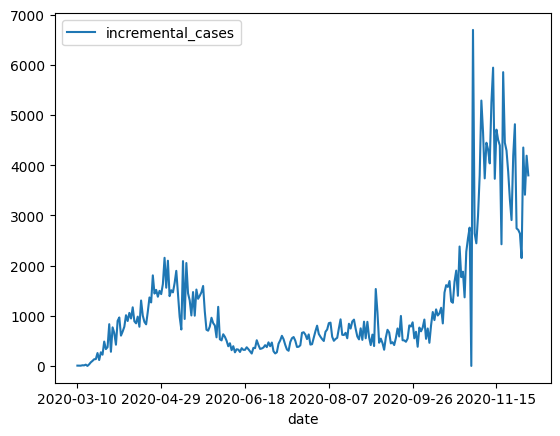

In [18]:


df = pd.read_csv('variable_selected_county_dataset.csv', index_col=0)

# get selected counties
chicago = df[df.entity == 'Illinois-Cook']
chicago = chicago[['date', 'incremental_cases']]
#miami.reset_index(inplace=True)
chicago.plot(x='date', y='incremental_cases')

diffDf = chicago.set_index('date')

#need to differentiate twice to not be stationary
statDF = diffDf.diff()
firstVal = diffDf.iloc[0,:].incremental_cases
split = int(0.85 * len(statDF))
train = statDF.iloc[:split,:]
test = statDF.iloc[split:, :]
compareTest = diffDf.iloc[split:, :]

In [19]:
def fromTestDiffToActualInc(test, firstVal):
    test.iloc[0,0] += firstVal
    return test.cumsum()

In [13]:
# evaluate parameters
p_values = range(0,10,3)
d_values = range(0,10,3)
q_values = range(0,10,3)
vals = []
prev = 100000000000000000000000000
for p in p_values:
    for d in d_values:
        for q in q_values:
            orderToUse = (6,0,6) #from arima model
            hyperPar = (p, d, q, 7) #weekly data
            model = SARIMAX(train.incremental_cases, order=orderToUse, seasonal_order=hyperPar)
            model.initialize_approximate_diffuse()
            model_fit = model.fit()
            # summary of fit model
            #print(model_fit.summary())
            # line plot of residuals
            #residuals = pd.DataFrame(model_fit.resid)
            #residuals.plot()
            #plt.show()
            # density plot of residuals
            #residuals.plot(kind='kde')
            #plt.show()
            # summary stats of residuals
            #print(residuals.describe())
            forecast = model_fit.forecast(steps=41)

            predictTest = pd.DataFrame(forecast)
            predictTest.columns=['incremental_cases']

            foo = pd.DataFrame(model_fit.fittedvalues, columns=['incremental_cases'])
            
            foo.iloc[0,0] = diffDf.iloc[0,0]
            foo = foo.cumsum()

            firstVal = foo.iloc[-1,0].copy()

            fooooo = predictTest.copy()
            finalIncrementPreds = fromTestDiffToActualInc(fooooo, firstVal)


            
            #mseEval = predictTest.incremental_cases - test.incremental_cases
            r2 = mean_squared_error(compareTest.incremental_cases, finalIncrementPreds.incremental_cases)
            if r2 < prev:
                prev = r2
                best = hyperPar
                
            print(r2, 'for parameters', hyperPar)

print(best, prev)

43005215.375669226 for parameters (0, 0, 0, 7)
42146189.074327804 for parameters (0, 0, 3, 7)
69478699.3314782 for parameters (0, 0, 6, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


42781611.643916704 for parameters (0, 0, 9, 7)
4923115.321068925 for parameters (0, 3, 0, 7)
5511493.184095894 for parameters (0, 3, 3, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


6049400.741958467 for parameters (0, 3, 6, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


18935416.99317751 for parameters (0, 3, 9, 7)
381020334781.9016 for parameters (0, 6, 0, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


7858436163806.88 for parameters (0, 6, 3, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


327166383665.7129 for parameters (0, 6, 6, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


1021645121047.5483 for parameters (0, 6, 9, 7)
192965116452103.2 for parameters (0, 9, 0, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


390096035600721.7 for parameters (0, 9, 3, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


1435426987738694.8 for parameters (0, 9, 6, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


1522018191217351.5 for parameters (0, 9, 9, 7)
18141804.440472595 for parameters (3, 0, 0, 7)
17107109.376881354 for parameters (3, 0, 3, 7)
9539595.888639951 for parameters (3, 0, 6, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


111853759.33110523 for parameters (3, 0, 9, 7)
16354197.027993903 for parameters (3, 3, 0, 7)
6930750.99902604 for parameters (3, 3, 3, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


53780910.3236034 for parameters (3, 3, 6, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


7908730.762197355 for parameters (3, 3, 9, 7)
3823160678912.7646 for parameters (3, 6, 0, 7)
28836931607433.883 for parameters (3, 6, 3, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


32789372551901.17 for parameters (3, 6, 6, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


3657956287367.7637 for parameters (3, 6, 9, 7)
543042156951469.25 for parameters (3, 9, 0, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


233468515298016.97 for parameters (3, 9, 3, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


2.096469041845401e+16 for parameters (3, 9, 6, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


2.771210634464797e+16 for parameters (3, 9, 9, 7)
8436178.733362285 for parameters (6, 0, 0, 7)
34563333.711708695 for parameters (6, 0, 3, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


18477642.272471678 for parameters (6, 0, 6, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


61367129.96311712 for parameters (6, 0, 9, 7)
5182154.897740014 for parameters (6, 3, 0, 7)
4355619.935711216 for parameters (6, 3, 3, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


9787692.60872499 for parameters (6, 3, 6, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


10729143.484946312 for parameters (6, 3, 9, 7)
37236038973901.195 for parameters (6, 6, 0, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


87323441903916.86 for parameters (6, 6, 3, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


11319419805540.607 for parameters (6, 6, 6, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


8564590115106.027 for parameters (6, 6, 9, 7)
42746760929386.06 for parameters (6, 9, 0, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


2.7634260727736076e+16 for parameters (6, 9, 3, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


1.0423850757207976e+16 for parameters (6, 9, 6, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


9.275336674558907e+16 for parameters (6, 9, 9, 7)
33853184.7946982 for parameters (9, 0, 0, 7)
44933971.5177339 for parameters (9, 0, 3, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


51469149.8198512 for parameters (9, 0, 6, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


46508855.39521209 for parameters (9, 0, 9, 7)
25828133.20527883 for parameters (9, 3, 0, 7)
6058199.9112769915 for parameters (9, 3, 3, 7)
4748467.487457698 for parameters (9, 3, 6, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


6755326.028596984 for parameters (9, 3, 9, 7)
8906839668323.355 for parameters (9, 6, 0, 7)
33226865075984.89 for parameters (9, 6, 3, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


3008034877999.593 for parameters (9, 6, 6, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


35610385957948.82 for parameters (9, 6, 9, 7)
7.10440255362795e+16 for parameters (9, 9, 0, 7)
5.463244195676277e+18 for parameters (9, 9, 3, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


9.003282392206203e+16 for parameters (9, 9, 6, 7)


C:\ProgramData\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


2.687416189344558e+17 for parameters (9, 9, 9, 7)
(6, 3, 3, 7) 4355619.935711216


In [ ]:
orderToUse = (6,0,6) #from arima model
hyperPar = (6, 3, 3, 7) #weekly data
model = SARIMAX(train.incremental_cases, order=orderToUse, seasonal_order=hyperPar)
model.initialize_approximate_diffuse()
model_fit = model.fit()
# summary of fit model
#print(model_fit.summary())
# line plot of residuals
#residuals = pd.DataFrame(model_fit.resid)
#residuals.plot()
#plt.show()
# density plot of residuals
#residuals.plot(kind='kde')
#plt.show()
# summary stats of residuals
#print(residuals.describe())
forecast = model_fit.forecast(steps=41)

predictTest = pd.DataFrame(forecast)
predictTest.columns=['incremental_cases']

foo = pd.DataFrame(model_fit.fittedvalues, columns=['incremental_cases'])

foo.iloc[0,0] = diffDf.iloc[0,0]
foo = foo.cumsum()

firstVal = foo.iloc[-1,0].copy()

fooooo = predictTest.copy()
finalIncrementPreds = fromTestDiffToActualInc(fooooo, firstVal)



#mseEval = predictTest.incremental_cases - test.incremental_cases
r2 = mean_squared_error(compareTest.incremental_cases, finalIncrementPreds.incremental_cases)
print(r2, 'for parameters', hyperPar)